In [1]:
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def plot_spectrogram(wav_file_path, binsize=2**10, plotpath="p5_9_whale_sing.png", colormap="jet"):
    samplerate, taken_samps = wav.read(wav_file_path)

    s = short_time_FT(taken_samps, binsize)

    sshow, freq = scale_freq_log(s, factor=1.0, sr=samplerate)

    spec_Output = 20.*np.log10(np.abs(sshow)/10e-6)

    timebins, freqbins = np.shape(spec_Output)

    plt.figure(figsize=(15, 7.5))
    plt.imshow(np.transpose(spec_Output), origin="lower", aspect="auto", cmap=colormap, interpolation="none")
    plt.colorbar()

    plt.xlabel("time (s)")
    plt.ylabel("freq (hz)")
    plt.xlim([0, timebins-1])
    plt.ylim([0, freqbins])

    xlocs = np.float32(np.linspace(0, timebins-1, 5))
    plt.xticks(xlocs, ["%.02f" % l for l in ((xlocs*len(taken_samps)/timebins)+(0.5*binsize))/samplerate])
    ylocs = np.int16(np.round(np.linspace(0, freqbins-1, 10)))
    plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])

    if plotpath:
        plt.savefig(plotpath, bbox_inches="tight")
        plt.show()
    else:
        plt.show()

    plt.clf()

    return spec_Output



def scale_freq_log(spec, sr=44100, factor=20.):
    timebins, freqbins = np.shape(spec)

    scale = np.linspace(0, 1, freqbins) ** factor
    scale *= (freqbins-1)/max(scale)
    scale = np.unique(np.round(scale))
    newspec = np.complex128(np.zeros([timebins, len(scale)]))
    for i in range(0, len(scale)):        
        if i == len(scale)-1:
            newspec[:,i] = np.sum(spec[:,int(scale[i]):], axis=1)
        else:        
            newspec[:,i] = np.sum(spec[:,int(scale[i]):int(scale[i+1])], axis=1)

    allfreqs = np.abs(np.fft.fftfreq(freqbins*2, 1./sr)[:freqbins+1])
    freqs = []
    for i in range(0, len(scale)):
        if i == len(scale)-1:
            freqs += [np.mean(allfreqs[int(scale[i]):])]
        else:
            freqs += [np.mean(allfreqs[int(scale[i]):int(scale[i+1])])]

    return newspec, freqs


def short_time_FT(sig, frameSize, overlapFac=0.5, window=np.hanning):
    win = window(frameSize)
    hop_sze = int(frameSize - np.floor(overlapFac * frameSize))
    taken_samps = np.append(np.zeros(int(np.floor(frameSize/2.0))), sig)    
    columns = np.ceil( (len(taken_samps) - frameSize) / float(hop_sze)) + 1
    taken_samps = np.append(taken_samps, np.zeros(frameSize))
    frames = stride_tricks.as_strided(taken_samps, shape=(int(columns), frameSize), strides=(taken_samps.strides[0]*hop_sze, taken_samps.strides[0])).copy()
    frames *= win

    return np.fft.rfft(frames)    

#### Flute audio is recorded on Audacity 44100Hz - Mono - 32 bit float
#### popcan_drop was taken from previous years audio file, i have choose that because it we can clearly see the drop on spectrogram
#### for both popcan and the freaks the settings are as above

#### Duration for flute is 14secs , popcan_drop is 4secs and freaks is 16secs

C:\Users\dheeraj\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


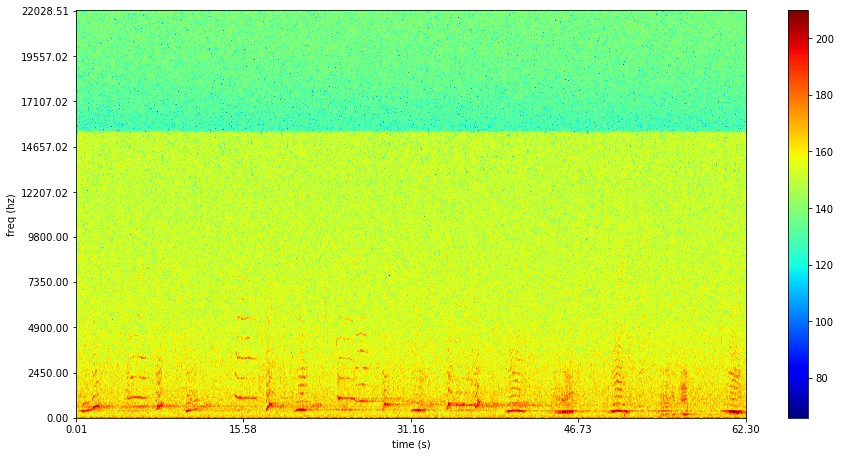

<Figure size 432x288 with 0 Axes>

In [7]:
spec_Output = plot_spectrogram('whale_sing.wav')